 **EDA on Premier League Dataset**

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><strong>Problem Statement</strong></a></span></li><li><span><a href="#Importing-packages" data-toc-modified-id="Importing-packages-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing packages</a></span></li><li><span><a href="#Loading-Data" data-toc-modified-id="Loading-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Loading Data</a></span><ul class="toc-item"><li><span><a href="#Importing-Dataset" data-toc-modified-id="Importing-Dataset-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Importing Dataset</a></span><ul class="toc-item"><li><span><a href="#Description-of-Dataset" data-toc-modified-id="Description-of-Dataset-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Description of Dataset</a></span></li></ul></li><li><span><a href="#Pandas-Profiling-before-Data-Preprocessing" data-toc-modified-id="Pandas-Profiling-before-Data-Preprocessing-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Pandas Profiling before Data Preprocessing</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span><ul class="toc-item"><li><span><a href="#Actionable-Insights" data-toc-modified-id="Actionable-Insights-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Actionable Insights</a></span></li></ul></li></ul></div>

<a id=section1></a>
# **Problem Statement**

Premier League (EPL) often referred to as **English Premier League** is one of the most popular football leagues in the world. Contested by 20 clubs, it operates on a system of promotion and relegation with the **English Football League (EFL)**. The competition was founded as the FA Premier League on 20 February 1992 following the decision of clubs in the Football League First Division to break away from the Football League, founded in 1888. 

To explore the English Premier League data, so as to understand how it has fared across different seasons and evolved over the years. Analysis can help to determine trends in league over a season from August to May. 

# Importing packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style='whitegrid', font_scale=1.3, color_codes=True)

pd.set_option("mode.chained_assignment", None)
pd.set_option("display.max_colwidth", 20)         # To display all the data in each column
pd.set_option("display.max_columns", None)          # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

<a id=section3></a>
# Loading Data

Over here we are using a single dataset containing all the data across seasons for each team that has played Premier League

## Importing Dataset

In [3]:
epl_dataset = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/English_Premier_League.csv")
epl_dataset.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,E0,14/08/93,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,1993-94
1,E0,14/08/93,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,1993-94
2,E0,14/08/93,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,1993-94
3,E0,14/08/93,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,1993-94
4,E0,14/08/93,Man City,Leeds,1,1,D,NaN,NaN,NaN,1993-94


### Description of Dataset

-This dataset contains the **match details of matches for all the seasons** including Half-Time & Full-Time scores, Goals scored in Half-Time and Full-Time as well.

| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
| Div                            | The division the match was played in.                                                      |
| Date                           | The date the match was played.                                                             | 
| HomeTeam                       | The name of the home team.                                                                 | 
| AwayTeam                       | The name of Away team.                                                                     |
| FTHG                           | The total number of goals scored by the home team during the match at full time.           |
| FTAG                           | The total number of goals scored by the away team during the match at full time.           |
| FTR                            | The full time result ('H' for home team win, 'A' for away team win, or 'D' for draw).      |
| HTHG                           | The total number of goals scored by the home team at half time.                            |
| HTAG                           | The total number of goals scored by the away team at half time.                            |
| HTR                            | The half time result('H' for home team advntage,'A' for away team advntage, or'D'for draw) |
| Season                         | 	The season in which the match was played.                                                 |

In [4]:
epl_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9664 entries, 0 to 9663
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       9664 non-null   object 
 1   Date      9664 non-null   object 
 2   HomeTeam  9664 non-null   object 
 3   AwayTeam  9664 non-null   object 
 4   FTHG      9664 non-null   int64  
 5   FTAG      9664 non-null   int64  
 6   FTR       9664 non-null   object 
 7   HTHG      8740 non-null   float64
 8   HTAG      8740 non-null   float64
 9   HTR       8740 non-null   object 
 10  Season    9664 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 830.6+ KB


- We get the following insights using the **info()** function
    - There are **9664 rows** and **11 columns**
    - There are **4 columns** with **numeric** datatypes and **7 columns** with **object** datatype
    - For **HTR, HTAG & HTHG** there are **924** null records

In [5]:
epl_dataset['Season'].nunique()

25

- There are **25 Unique records** in **Season** column using **nunique()** function

In [6]:
epl_dataset.describe()

,FTHG,FTAG,HTHG,HTAG
count,9664.000000,9664.000000,8740.000000,8740.000000
mean,1.523903,1.121482,0.685469,0.488444
std,1.301671,1.121667,0.833581,0.710524
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000
max,9.000000,8.000000,5.000000,5.000000


- ```describe``` function gives us the following insights into the data:
  
  - **FTHG** column is having an almost **normal distribution** because the **mean (25.8534)** value is close to the **median (27.0561)** value.

  - The distribution of **FTHG & FTAG** is **positive (right) skewed** because the **mean** of **FTHG(1.523903) & FTAG (1.121482)** lies to the **right** of the **median(50%)** value **(1.000)**, on a **distribution plot**.

  - The distribution of **FTHG & FTAG** is **positive (right) skewed** because the **mean** of **HTHG(0.685469) & HTAG (0.488444)** lies to the **right** of the **median(50%)** value **(0.000)**, on a **distribution plot**.
  
  - The **max** value of **FTHG, FTAG, HTHG and HTAG (1880.000)** is an **outlier** because it lies far away from the mean.
  
  - Similarly comparing the **75%** and **max** values of the above mentioned columns we can see that there are **outliers** present in some other columns.

## Pandas Profiling before Data Preprocessing

In [7]:
import pandas_profiling

- Here, I have performed **Pandas Profiling before preprocessing** of the dataset, so I have named the **output file** as __EPL_profiling_before_preprocessing.html__. 

In [8]:
profile = epl_dataset.profile_report(title="English Premier League Profiling before Data Preprocessing", progress_bar=False, minimal=True)
profile.to_file(output_file="EPL_profiling_before_preprocessing.html")

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 11
- Number of observations: 9664
- Missing cells: 2772 (2.6%)


__Variables types__: 
- Numeric = 4
- Categorical = 7

<br>

- **Div** has **constant value "EO"**.


- **HTHG, HTAG & HTR** has **924 (9.6%) missing values**.


- **Date** has **high cardinality (2572 distinct values)**

In [9]:
epl_dataset.drop(['Div'],axis=1,inplace= True)

- Dropped **Div** column as it has constant values and no variations

In [10]:
epl_dataset.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,14/08/93,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,1993-94
1,14/08/93,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,1993-94
2,14/08/93,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,1993-94
3,14/08/93,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,1993-94
4,14/08/93,Man City,Leeds,1,1,D,NaN,NaN,NaN,1993-94


In [11]:
epl_dataset['Date'].unique()

array(['14/08/93', '15/08/93', '16/08/93', ..., '9/5/2018', '10/5/2018',
       '13/05/18'], dtype=object)

In [12]:
y=epl_dataset['HomeTeam'].nunique()
#x=y.count()
y

50

-By applying **unique** function we find out that there are total of **50 teams** who have played in Premier League for the given duration

In [13]:
epl_dataset.isnull().sum()

Date          0
HomeTeam      0
AwayTeam      0
FTHG          0
FTAG          0
FTR           0
HTHG        924
HTAG        924
HTR         924
Season        0
dtype: int64

- This shows that there are **924** records in columns **HTHG, HTAG and HTR** which are blank

# Exploratory Data Analysis

- In this portion I have done **EDA** on the **Premier League** dataset and have come up with analysis and insights.

In [14]:
epl_dataset['FTR'].value_counts()

H    4461
A    2657
D    2546
Name: FTR, dtype: int64

In [15]:
epl_dataset['HTR'].value_counts()

D    3679
H    3086
A    1975
Name: HTR, dtype: int64

In [16]:
df = pd.DataFrame(epl_dataset, columns = ['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','Season'])
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,14/08/93,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,1993-94
1,14/08/93,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,1993-94
2,14/08/93,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,1993-94
3,14/08/93,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,1993-94
4,14/08/93,Man City,Leeds,1,1,D,NaN,NaN,NaN,1993-94


Text(0.5, 1.0, 'Number of matches played per season')

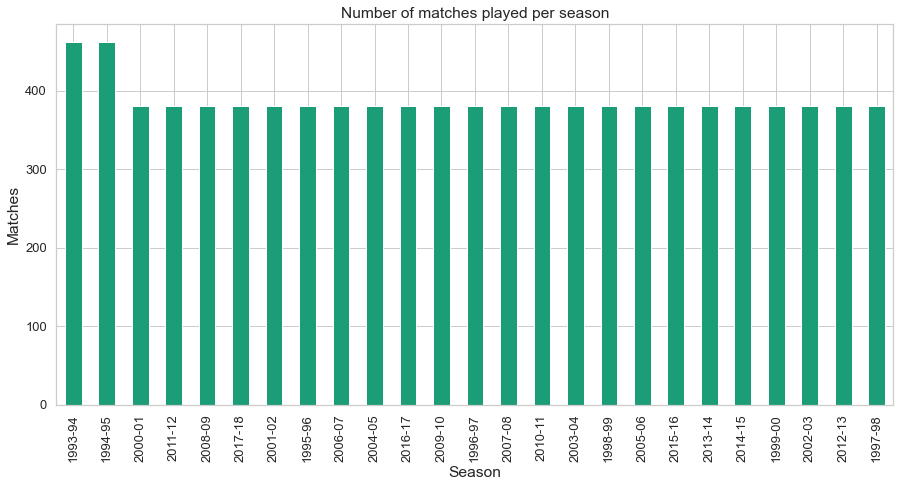

In [65]:
df['Season'].value_counts().plot.bar(figsize=(15,7), colormap='Dark2', fontsize=13)

plt.xlabel('Season')
plt.ylabel('Matches')
plt.title('Number of matches played per season')

- Here we are comparing the number of matches played in each seasons. From the above plot we can see,the number of matches played **1993-94** and **1994-95** season is around 480 which is higher than the matches played in the remaining season.

Text(0.5, 1.0, 'Win % across season for Home and Away teams')

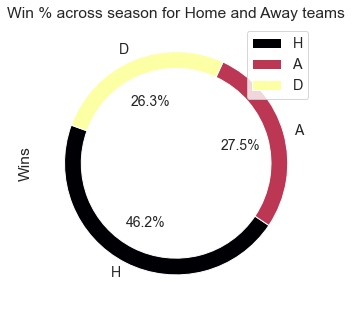

In [18]:
df['FTR'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       shadow=False, startangle=160, figsize=(5,15), cmap='inferno', legend=True)
plt.ylabel('Wins')
plt.title('Win % across season for Home and Away teams')

- From the above plot we can see that based on Full Time Results, the Win% is highest for Home Team at around **46.2%**.
- The chances of winning a match by Away Team is **27.5%** and the chances of match ending as a Draw is **26.3%**

In [19]:
df_Goals_Scored = df[['Season','HomeTeam','AwayTeam','FTHG','FTAG','FTR']].copy()
df_Goals_Scored

,Season,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1993-94,Arsenal,Coventry,0,3,A
1,1993-94,Aston Villa,QPR,4,1,H
2,1993-94,Chelsea,Blackburn,1,2,A
3,1993-94,Liverpool,Sheffield Weds,2,0,H
4,1993-94,Man City,Leeds,1,1,D
...,...,...,...,...,...,...
9659,2017-18,Newcastle,Chelsea,3,0,H
9660,2017-18,Southampton,Man City,0,1,A
9661,2017-18,Swansea,Stoke,1,2,A
9662,2017-18,Tottenham,Leicester,5,4,H


- Creating a new dataframe named **df_Goals_Scored**

In [20]:
df_Goals_Scored['Total Goals'] = df_Goals_Scored['FTHG'] + df_Goals_Scored['FTAG']
df_Goals_Scored

,Season,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Total Goals
0,1993-94,Arsenal,Coventry,0,3,A,3
1,1993-94,Aston Villa,QPR,4,1,H,5
2,1993-94,Chelsea,Blackburn,1,2,A,3
3,1993-94,Liverpool,Sheffield Weds,2,0,H,2
4,1993-94,Man City,Leeds,1,1,D,2
...,...,...,...,...,...,...,...
9659,2017-18,Newcastle,Chelsea,3,0,H,3
9660,2017-18,Southampton,Man City,0,1,A,1
9661,2017-18,Swansea,Stoke,1,2,A,3
9662,2017-18,Tottenham,Leicester,5,4,H,9


Text(0, 0.5, 'Seasons')

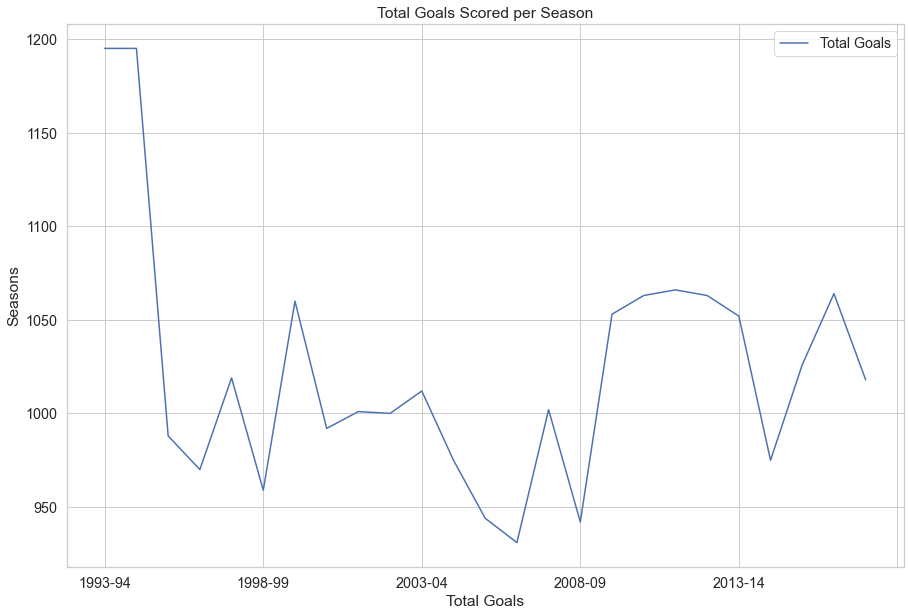

In [21]:
df_Goals_Scored[['Season','Total Goals']].groupby('Season').sum().plot(kind='line', figsize=(15, 10), stacked = False)

plt.title("Total Goals Scored per Season")
plt.xlabel("Total Goals")
plt.ylabel("Seasons")

Over here we are analysing the overall goals scored per season. We get the following insights from the plot:
- The **1993-94, 1994-95** showed the highest number of goals scored **1195** each (both by **Home and Away** teams).
- The **2006-07** season is where the least number of goals (**931**) were scored.

Text(0, 0.5, 'Avg Goals scored')

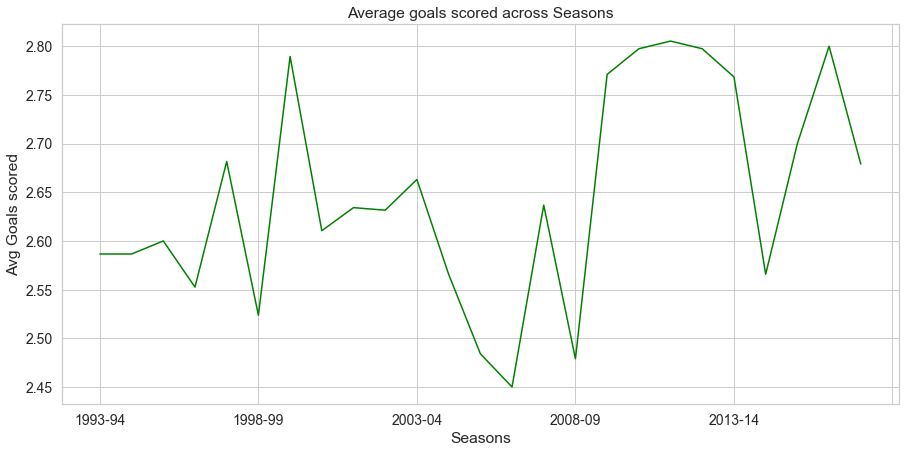

In [22]:
df_Goals_Scored.groupby(['Season'])['Total Goals'].mean().plot(kind='line', fontsize=14, figsize=(15,7), legend=False, stacked=False,color='green')

plt.title("Average goals scored across Seasons")
plt.xlabel("Seasons")
plt.ylabel("Avg Goals scored")

Although we have seen the number of goals scored in **1993-94** and **1994-95** season has been the highest but the average goals scored is different.

- The Avg of goals scored is highest in **2011-12** which is above **2.80**. Followed by **2010-11 and 2012-13** season (~2.79)
- The avg dipped to its lowest in **2006-07** season to around **2.45**.

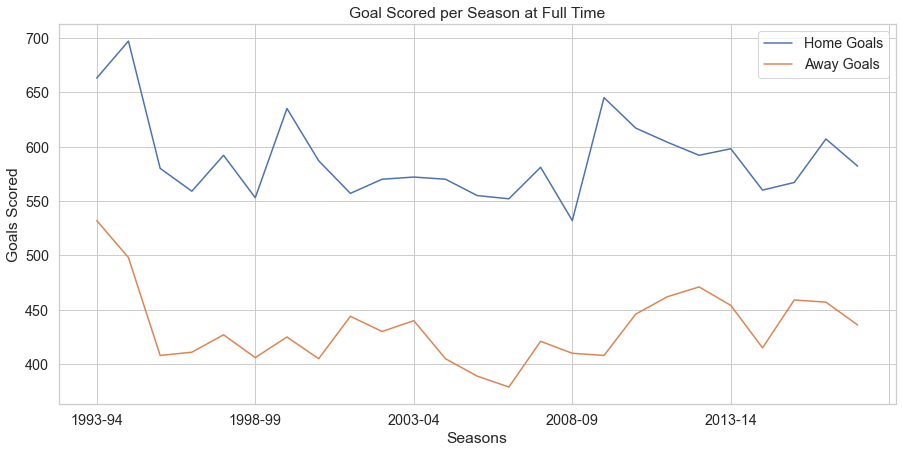

In [23]:
y = df[['Season','FTHG','FTAG']].groupby('Season').sum().plot(kind='line', figsize=(15, 7), stacked = False)

plt.xlabel('Seasons')
plt.ylabel('Goals Scored')
plt.title('Goal Scored per Season at Full Time')
# lines is a list of plt.Line2D instances
plt.legend(['Home Goals', 'Away Goals'])

Here we analyse **Goals scored** by **Home and Away Teams** in each seasons.
- We conclude that in **1994-95 season** the **home teams** scored the **maximum** number of goals.
- Also, we can conclude that in **1993-94 season** the away teams scored the **maximum** number of goals.
- The **Home team** scored the **least goals** in the **season 2008-09**.
- The **Away team** scored the **least goals** in the **season 2006-07**.

Text(0.5, 1.0, 'Teams performance in Homeground')

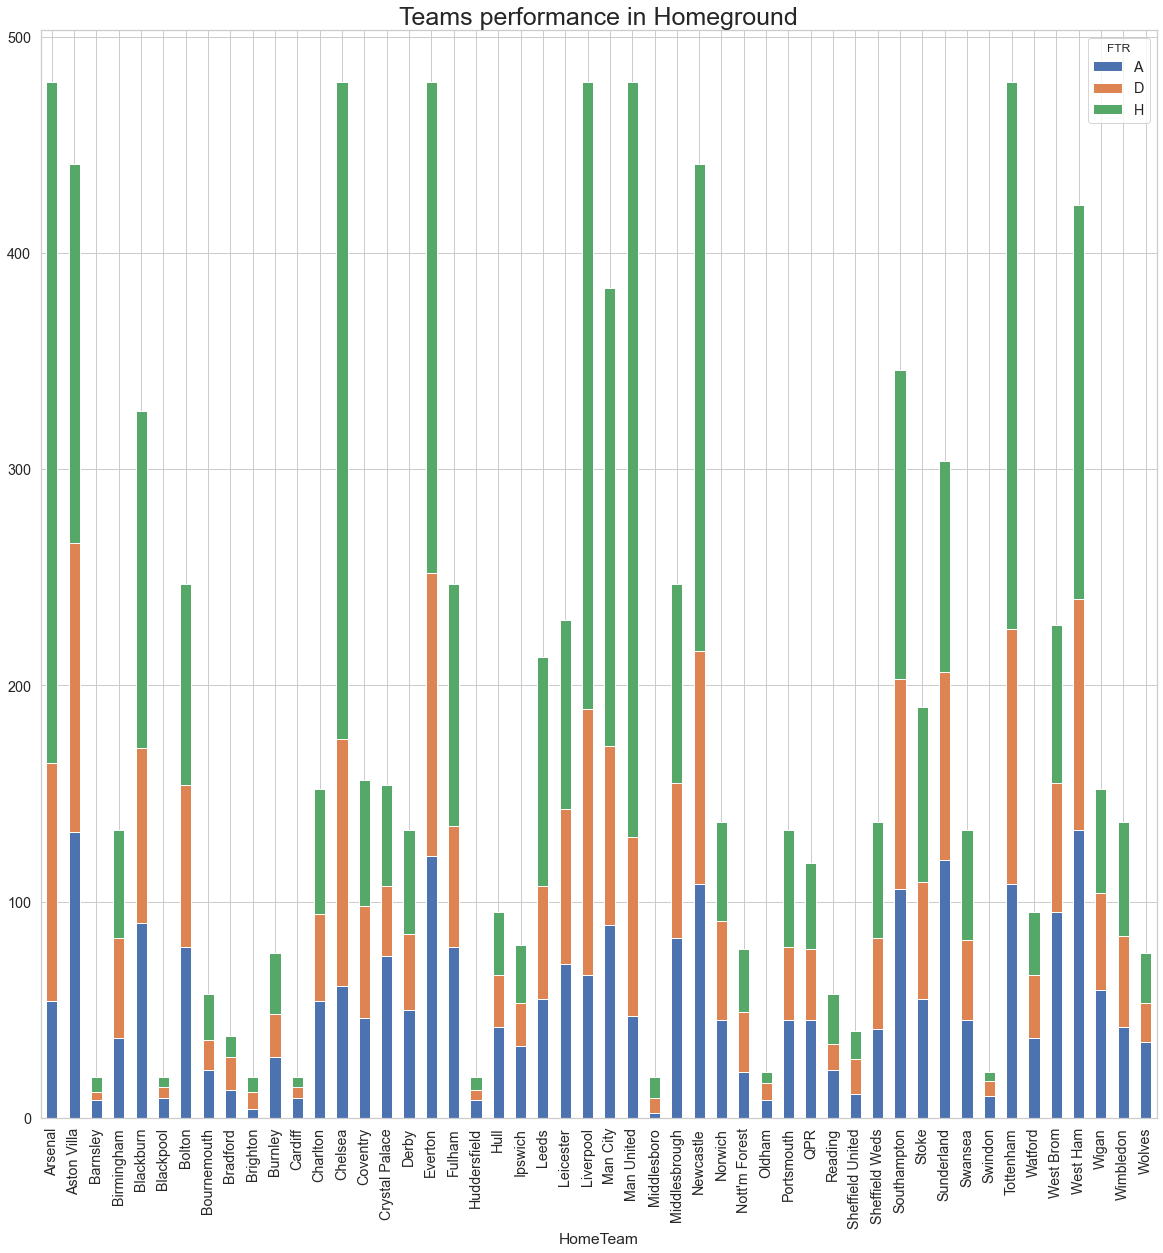

In [24]:
result = df['FTR']
df.groupby(["HomeTeam","FTR"]).size().unstack(level=1).plot(kind='bar',figsize=(20,20), stacked=True)
plt.title("Teams performance in Homeground", size=25)

Here we are analysing the number of times a team in it's homeground **won**,**drew**,**lost** over **all the seasons**.
- It can be noted from the figure that **Manchester United** has the **highest number of wins** in it's homeground amongst all the contenders.
- It can be noted that in **West Ham United**'s homeground, **away team** has won the maximum times.
- Also we can see teams like **Barnsley, Blackpool,Brighton,Cardiff, Huddersfield, Middlesboro, Oldham, Swindon** has overall goals scored very less as they have been part of **Premier League** for very few seasons.

Text(0.5, 1.0, 'Goal scoring ability of the Teams')

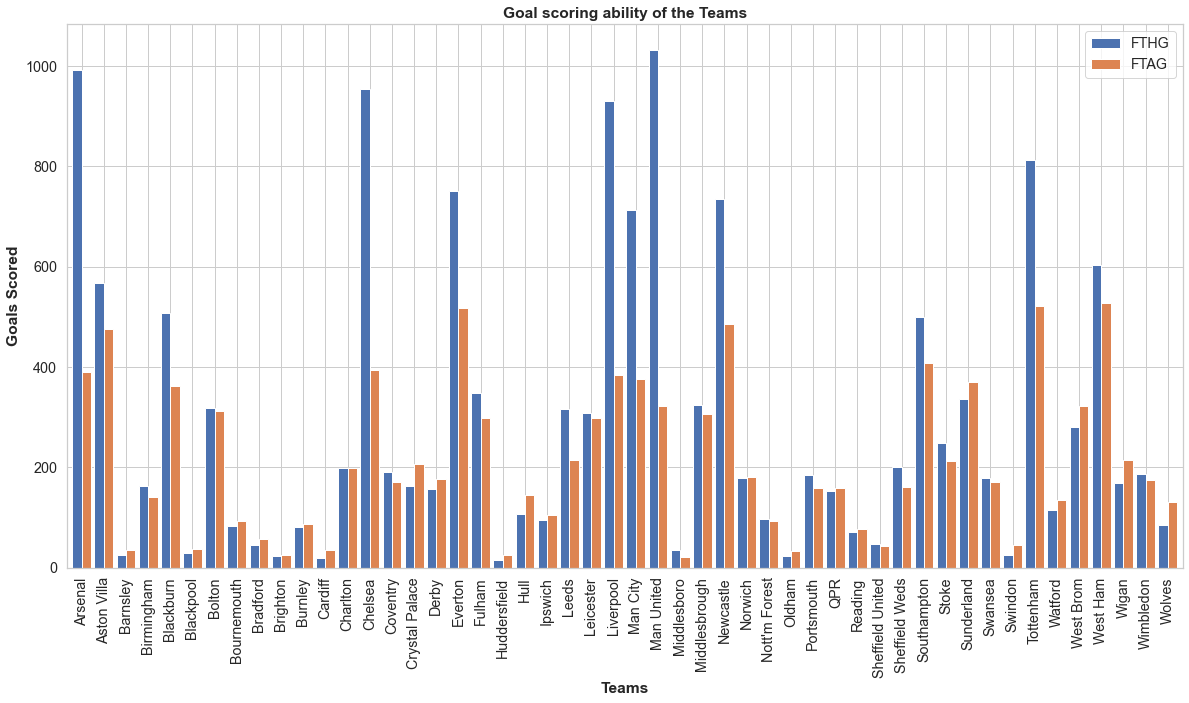

In [63]:
df[['HomeTeam','FTHG','FTAG']].groupby(['HomeTeam']).sum().plot(kind='bar',figsize=(20,10), width=0.85, edgecolor='white', label='Home Goal')

plt.xlabel('Teams', fontweight='bold')
plt.ylabel('Goals Scored', fontweight='bold')
plt.title('Goal scoring ability of the Teams', fontweight='bold')

Here we analyse the **goals scored** by each team in their **Home** and **Away** games all over the seasons.
We can conclude from the above figure that all the teams playing in EPL **scored more** in their **Home Games**

Here **Goal scoring ability** of all the teams who have **qualified** in **English Premier League** over all seasons has been analysed
- From the figure it can be noted that **Manchester United** has scored the **maximum goals** amongst its contenders over all the seasons.
- We can also see that the team with the **least goal scoring** ability is **Huddersfield**

- Here we are anlysing the **Away teams goal scoring ability** in Premier League across all the Seasons
- **Newcastle** has scored the highest goal while playing **Away**, followed by **Everton, Aston Villa, West Ham and Tottenham**
- **Oldham, Middlesboro,Huddersfield,Cardiff,Brighton,Barnsley,Blackpool** has scored the least number of goals while playing **Away**

Text(0.5, 1.0, 'Average goals scored by Teams')

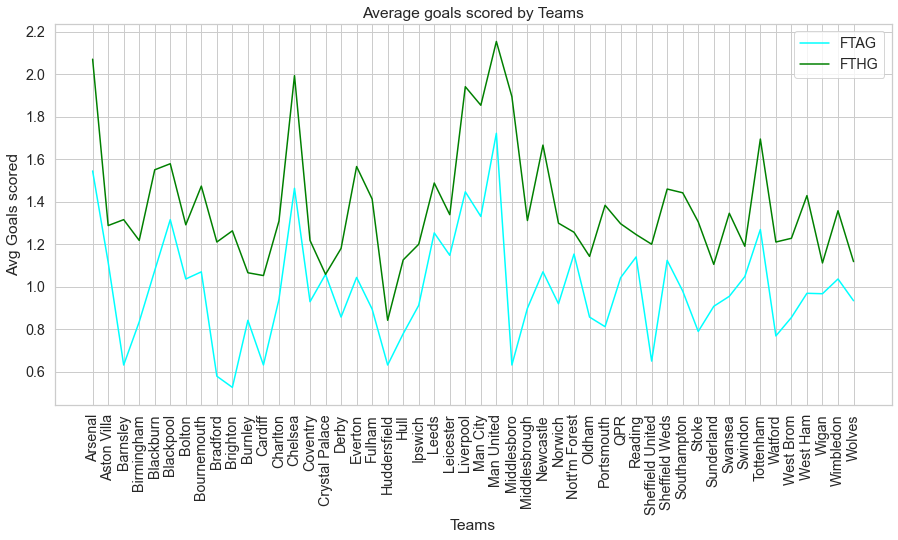

In [27]:
df_Goals_Scored.groupby(['AwayTeam'])['FTAG'].mean().plot(kind='line', figsize=(15,7), legend=True, stacked=False,color='cyan', xticks = np.arange(0,50,1))

df_Goals_Scored.groupby(['HomeTeam'])['FTHG'].mean().plot(kind='line', figsize=(15,7), legend=True, stacked=False,color='green')

plt.xticks(Rotation=90)

plt.xlabel("Teams")
plt.ylabel("Avg Goals scored")
plt.title("Average goals scored by Teams")

Now we are doing a drill-down of average goals(both Home and Away_Team) scored on basis of teams

- **Manchester United** has the highest average among all the clubs **>2**, followed by **Arsenal** while scoring at Home
- While scoring away **Manchester United** has the best average of **1.7**,whereas none other teams have an average **>1.6**

In [28]:
df_D_ht = df[df['HTR'] == 'D'] 

In [29]:
df_H_ht = df[df['HTR'] == 'H'] 

In [30]:
df_A_ht = df[df['HTR'] == 'A']

We have created 3 different dataframes to understand how half time results affect full time scores

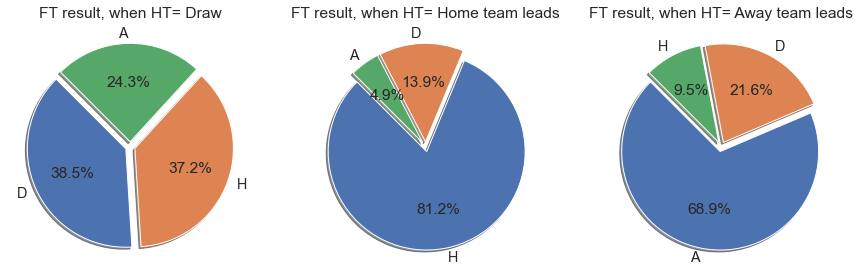

In [31]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (15, 15), sharex = True)

labels1 = list('DHA')
labels2 = list('HDA')
labels3 = list('ADH')

ax1.pie(df_D_ht['FTR'].value_counts(), labels = labels1,explode=[0.05,0.05,0.05], autopct='%3.1f%%', 
        shadow = True, startangle=135)
ax1.set_title('FT result, when HT= Draw')

ax2.pie(df_H_ht['FTR'].value_counts(), labels = labels2,explode=[0.05,0.05,0.05], autopct='%3.1f%%', 
        shadow = True,startangle=135)
ax2.set_title('FT result, when HT= Home team leads')

ax3.pie(df_A_ht['FTR'].value_counts(), labels = labels3, explode=[0.05,0.05,0.05], autopct='%3.1f%%', 
        shadow = True,startangle=135)
ax3.set_title('FT result, when HT= Away team leads')

plt.show()
#df_D_ht['FTR'].value_counts().plot(kind='pie', autopct='%3.1f%%', wedgeprops=dict(width=0.15))

Here we are analysing the **Half Time scores** of all matches across **all seasons**
- When **Half Time score =Draw** then **38.5%** of overall matches has been drawn, followed by **37.2%** of matches being won by Home Team and **24.3%** of matches being won by Away team
- When **Home team leads** at Half-time then **81.2%** of matches has been won by Home Team, **13.9%** matches being drawn and only **4.9%** of matches has been won by Away teams
- When **Away team leads** at Half-time then **68.9%** of matches has been won by Away teams, **21.6%0** has been drawn and very small percentage of **9.5** has been won by Home team

So, we can conclude that if a team leads at half time, chances of winning the match is higher. Also, if match is drawn at half time chances are high that the match will end in a draw or home team winning the match is higher.

In [32]:
df.iloc[df['Season'].sort_values(ascending=False)[:10].index, :]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
9663,13/05/18,West Ham,Everton,3,1,H,1.0,0.0,H,2017-18
9412,26/11/17,Huddersfield,Man City,1,2,A,1.0,0.0,H,2017-18
9403,20/11/17,Brighton,Stoke,2,2,D,1.0,2.0,A,2017-18
9404,24/11/17,West Ham,Leicester,1,1,D,1.0,1.0,D,2017-18
9405,25/11/17,Crystal Palace,Stoke,2,1,H,0.0,0.0,D,2017-18
9406,25/11/17,Liverpool,Chelsea,1,1,D,0.0,0.0,D,2017-18
9407,25/11/17,Man United,Brighton,1,0,H,0.0,0.0,D,2017-18
9408,25/11/17,Newcastle,Watford,0,3,A,0.0,2.0,A,2017-18
9409,25/11/17,Swansea,Bournemouth,0,0,D,0.0,0.0,D,2017-18
9410,25/11/17,Tottenham,West Brom,1,1,D,0.0,1.0,A,2017-18


In [33]:
from pandas.plotting import parallel_coordinates

In [34]:
!pip install plotly --upgrade

Requirement already up-to-date: plotly in e:\anaconda\lib\site-packages (4.11.0)


In [35]:
!pip install chart-studio

Text(0.5, 1.0, 'Donut Plot showing the percentage of Full Time goals scored by Home Teams')

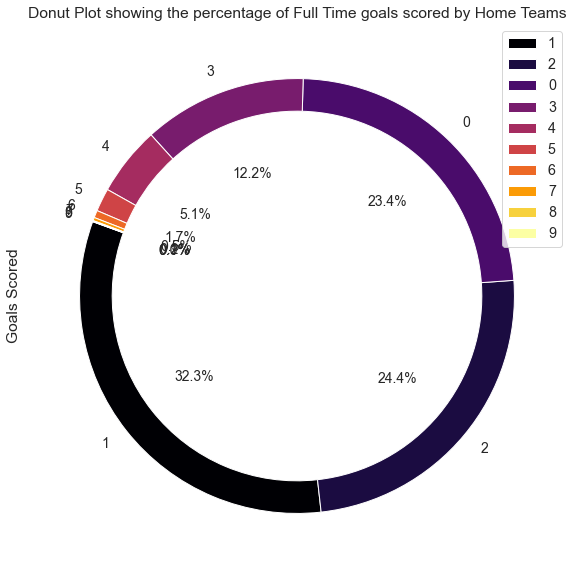

In [36]:
df_Goals_Scored['FTHG'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       shadow=False, startangle=160, figsize=(15,10), cmap='inferno', legend=True)
plt.ylabel('Goals Scored')
plt.title('Donut Plot showing the percentage of Full Time goals scored by Home Teams')

- **32.3%** of overall goals that were scored by Home Team were **solitary goals**, followed by **24.4% of goals scored** were **double**, and **23.4% of overall goals** were zero or Home team couldn't score.

- We can safely say that Home Teams have a higher chance of scoring a single or double goals rather than not scoring at all

Text(0.5, 1.0, 'Donut Plot showing the percentage of Full Time goals scored by Away Teams')

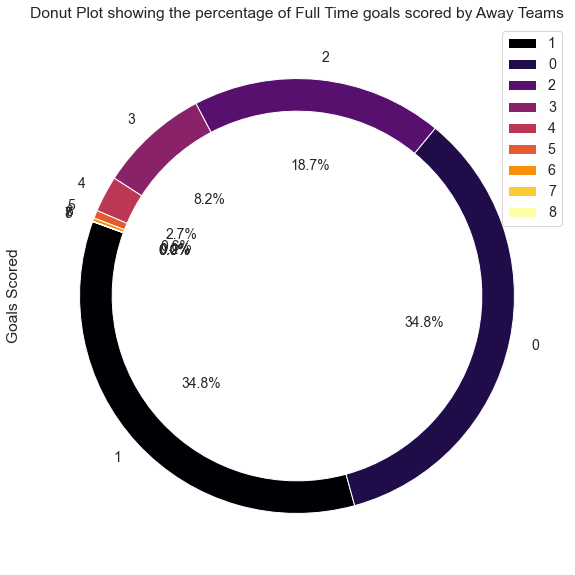

In [37]:
df_Goals_Scored['FTAG'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       shadow=False, startangle=160, figsize=(15,10), cmap='inferno', legend=True)
plt.ylabel('Goals Scored')
plt.title('Donut Plot showing the percentage of Full Time goals scored by Away Teams')

The away teams goals % analysis is somewhat different than home team analysis

- **34.8%** of times Away teams have scored a solitary goal
- **34.8%** of times the away teams couldn't score a single goal.
- **18.7%** and **8.2%** of times they have scored **2 goals** and **3 goals** respectively

In [70]:
x = df_Goals_Scored[df_Goals_Scored['HomeTeam'] == 'Man United']
y = df_Goals_Scored[df_Goals_Scored['AwayTeam'] == 'Man United']

Text(0, 0.5, 'Total Goals')

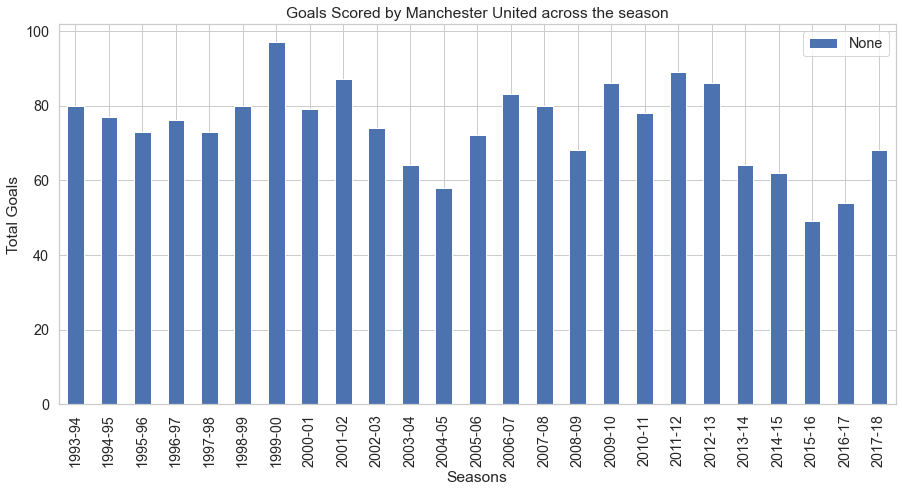

In [77]:
(x.groupby(['Season'])['FTHG'].sum()+y.groupby(['Season'])['FTAG'].sum()).plot(kind='bar', figsize = (15,7), stacked = False,legend=True)

plt.title("Goals Scored by Manchester United across the season")
plt.xlabel("Seasons")
plt.ylabel("Total Goals")

As we can see from the previous plot that **Manchester United** has the **highest average of goals scored** both at **Home & Away**. We drilled down to see how they performed across the Season.
- The **1999-00** showed **Manchester United** scoring around **75 goals** followed by **2011-12** season where they have scored **71 goals**

Text(0.5, 1.0, 'Performance of Manchester United')

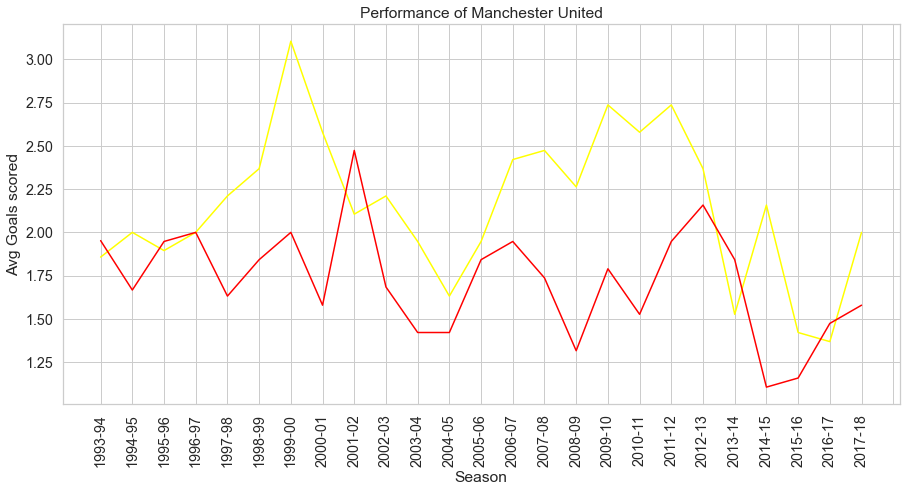

In [41]:
(x.groupby(['Season'])['FTHG'].sum()/x['Season'].value_counts()).plot(kind='line', figsize=(15,7),legend=False, stacked=False,color='yellow', xticks = np.arange(0,50,1))

(y.groupby(['Season'])['FTAG'].sum()/y['Season'].value_counts()).plot(kind='line', figsize=(15,7),legend=False, stacked=False,color='red')

plt.xticks(Rotation=90)

plt.xlabel("Season")
plt.ylabel("Avg Goals scored")
plt.title("Performance of Manchester United")

- From the above graph we can see that **Manchester United** had an average of **3.1** goals in the **1999-00** season and the lowest average of **1.36** goals in **2016-17** season
- In the away goals segment **Manchester United** had the highest average of **2.47** goals in **2001-02** season and the lowest average of **1.12** in the **2014-15** season.

Text(0.5, 1.0, 'Home Performance of Manchester United')

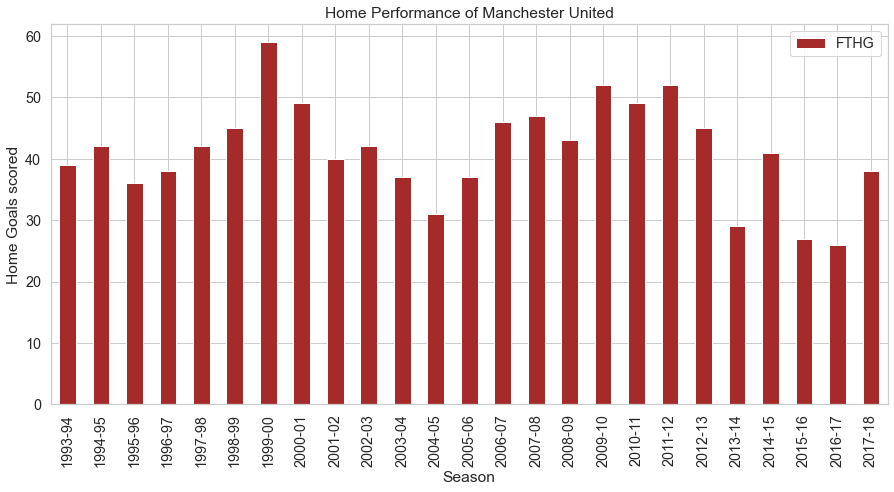

In [42]:
x.groupby(['Season'])['FTHG'].sum().plot(kind='bar', figsize=(15,7), legend=True, stacked=True,color='brown')

#y.groupby(['Season'])['FTAG'].sum().plot(kind='bar', figsize=(15,7), legend=True, stacked=True,color='red')


plt.xlabel("Season")
plt.ylabel("Home Goals scored")
plt.title("Home Performance of Manchester United")

Here we are analysing the **Home Goals** scored by **Manchester United** across all season.
- **Manchester United** has scored **58 goals** in **1999-00** season which is highest across all the **25 Season** that we have analysed.
- They have scored **26 goals** in **2016-17** season, which is the least  across all the season.

Text(0.5, 1.0, 'Away Performance of Manchester United')

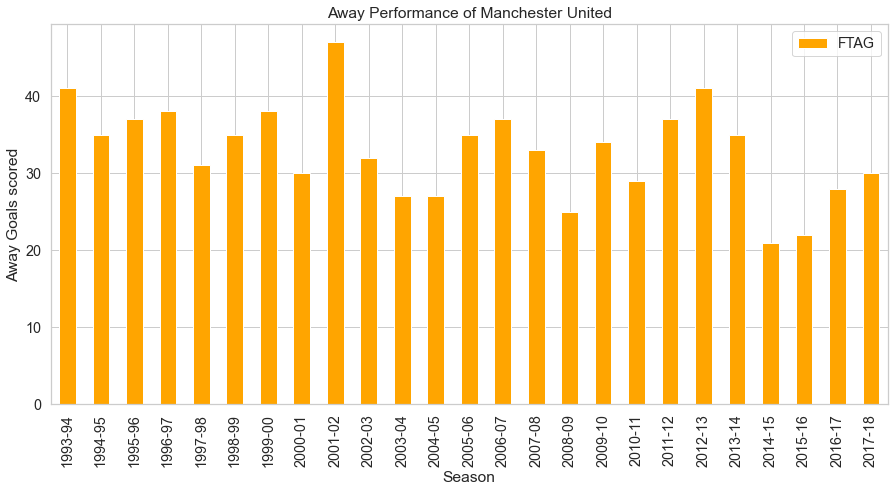

In [43]:
y.groupby(['Season'])['FTAG'].sum().plot(kind='bar', figsize=(15,7), legend=True, stacked=False,color='orange')
plt.xlabel("Season")
plt.ylabel("Away Goals scored")
plt.title("Away Performance of Manchester United")

Here we are analysing the **Away Goals** scored by **Manchester United** across all season.
- **Manchester United** has scored **47 goals** in **2001-02** season which is highest across all the **25 Season** that we have analysed.
- They have scored **21 goals** in **2016-17** season, which is the least  across all the season.

# Conclusion

- It can be concluded that Teams playing at **Home** has higher chance of winning as compared to teams playing **Away**
- If the match is **Drawn** at halftime chances of match ending in a **draw is higher**
- If **Home team leads** at half time chances of **Home team winning is higher**
- If **Away team leads** at half time chances of **Away team winning is higher**
- **Home Team** generally scores more goal at **Home Ground** compared to **Away ground**

## Actionable Insights
- More teams should be included or promoted to Premier League, so that it will become more competititve.
- Teams need to win more matches to stay in the top half of league table, so that they are not relegated. Fo example, teams like **Burnley**, **Blackpool**, **Huddersfield** etc have played very few matches. It means they couldn't sustain in the long run and got relegated.
- In order to win the league, whatever maybe the Half Time score, team needs to win the match. The more the win, the greater the chance of winning the premier league
- Another shortcoming is, scores need to be captured for better analysis of dataset, as halftime scores had been **NaN** for many matches.